<a href="https://colab.research.google.com/github/shreyahirave45/Weather-Prediction/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#aren't important

In [2]:
#Load data:
data = pd.read_csv('/content/Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
#data analysis:
print(data.shape)
print("")
print(data.columns)
print("")
print(data.dtypes)
print("")
print(data.info())

(8784, 8)

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), 

In [4]:
data.Weather.value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [5]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [6]:
data.Weather.nunique()

50

Converting the Weather categories into standard categories


In [8]:
x ='Thunderstroms,Moderate Rain Showers, Fog'

In [9]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstroms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [10]:
#Flattening:
#Easy Access: You can quickly access any word without needing to go through multiple lists.
from itertools import chain #create infinite iterators.
flat_list = list(chain.from_iterable(list_of_lists))
flat_list

['Thunderstroms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [11]:
def create_list(x):
  list_of_lists = [w.split() for w in x.split(',')]
  flat_list = list(chain(*list_of_lists))
  return flat_list


def Get_weather(list1):
  if 'Fog' in list1 and 'Rain' in list1:
    return 'RAIN+FOG'
  elif 'Snow' in list1 and 'Rain' in list1:
    return 'SNOW+RAIN'
  elif 'Snow' in list1:
    return 'SNOW'
  elif 'Rain' in list1:
    return 'RAIN'
  elif 'Thunderstorm' in list1:
    return 'Thunderstorm'
  elif 'Fog' in list1:
    return 'FOG'
  elif 'Clear' in list1:
    return 'Clear'
  elif 'Cloudy' in list1:
    return 'Cloudy'
  else:
    return 'RAIN'

In [12]:
create_list(x)

['Thunderstroms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [13]:
Get_weather(create_list(x))

'RAIN+FOG'

In [14]:
data['std_Weather'] = data['Weather'].apply(lambda x: Get_weather(create_list(x)))
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [15]:
data.std_Weather.value_counts()

,count
std_Weather,
Cloudy,3797
Clear,3432
RAIN,603
SNOW,556
FOG,241
RAIN+FOG,129
SNOW+RAIN,26


sample selection and data balancing

In [16]:
Cloudy_df = data[data['std_Weather'] == 'Cloudy'].sample(600)
Cloudy_df.shape
Clear_df = data[data['std_Weather'] == 'Clear'].sample(600)
Clear_df.shape

(600, 9)

Data balancing

In [17]:
Rain_df = data[data['std_Weather'] == 'RAIN']

Snow_df = data[data['std_Weather'] == 'SNOW']

In [18]:
Snow_df.shape

(556, 9)

In [19]:
Rain_df.shape

(603, 9)

Create a new weather dataset (consulatation)

In [20]:
import pandas as pd

Weather_df = pd.concat([Cloudy_df,Clear_df,Rain_df,Snow_df],axis=0)
Weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_Weather
6033,9/8/2012 9:00,23.2,19.0,77,13,19.3,99.54,Cloudy,Cloudy
5110,7/31/2012 22:00,22.8,19.4,81,7,25.0,100.57,Mostly Cloudy,Cloudy
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy,Cloudy
1590,3/7/2012 6:00,-4.3,-10.3,63,15,24.1,101.98,Cloudy,Cloudy
341,1/15/2012 5:00,-21.3,-26.5,63,6,25.0,102.19,Mostly Cloudy,Cloudy


In [21]:
Weather_df.shape

(2359, 9)

In [22]:
Weather_df.std_Weather.value_counts()

,count
std_Weather,
RAIN,603
Cloudy,600
Clear,600
SNOW,556


Drop column data and weather

In [23]:
weather_df = Weather_df.drop(['Date/Time','Weather'],axis=1)
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
6033,23.2,19.0,77,13,19.3,99.54,Cloudy
5110,22.8,19.4,81,7,25.0,100.57,Cloudy
8762,-10.1,-13.4,77,9,25.0,101.45,Cloudy
1590,-4.3,-10.3,63,15,24.1,101.98,Cloudy
341,-21.3,-26.5,63,6,25.0,102.19,Cloudy


Duplicates Records



In [24]:
# missing values
weather_df.isnull().sum()

,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
std_Weather,0


Data Visuallization

In [25]:
#All numericalsummary
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.677109,1.469818,71.783807,16.677406,23.321619,100.817546
std,11.232027,10.397962,16.270453,9.360591,12.822825,0.920448
min,-22.200000,-27.800000,18.000000,0.000000,0.600000,97.520000
25%,-2.500000,-6.700000,61.000000,9.000000,16.100000,100.305000
50%,5.300000,0.400000,75.000000,15.000000,24.100000,100.860000
75%,16.300000,10.300000,84.500000,22.000000,25.000000,101.430000
max,33.000000,23.100000,99.000000,57.000000,48.300000,103.650000


correaltion among the features:



In [26]:
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.936043,-0.247927,-0.149187,0.414766,-0.074995
Dew Point Temp_C,0.936043,1.000000,0.101663,-0.131847,0.194387,-0.197998
Rel Hum_%,-0.247927,0.101663,1.000000,0.061459,-0.663806,-0.360343
Wind Speed_km/h,-0.149187,-0.131847,0.061459,1.000000,-0.163077,-0.396970
Visibility_km,0.414766,0.194387,-0.663806,-0.163077,1.000000,0.339830
Press_kPa,-0.074995,-0.197998,-0.360343,-0.396970,0.339830,1.000000


Heat map

<Axes: >

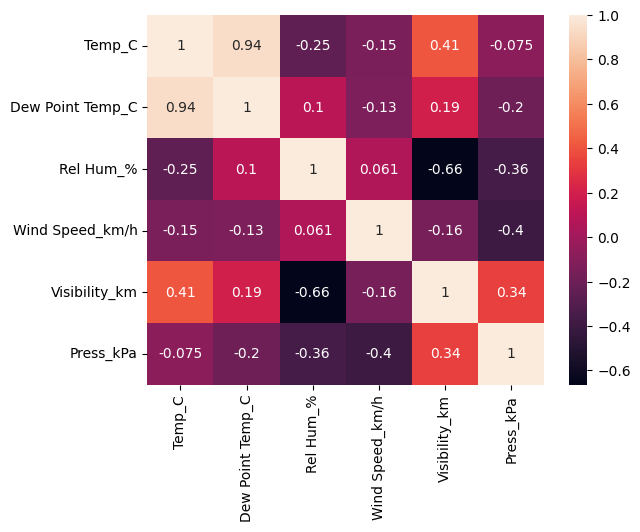

In [27]:
sns.heatmap(cor_matrix, annot=True)

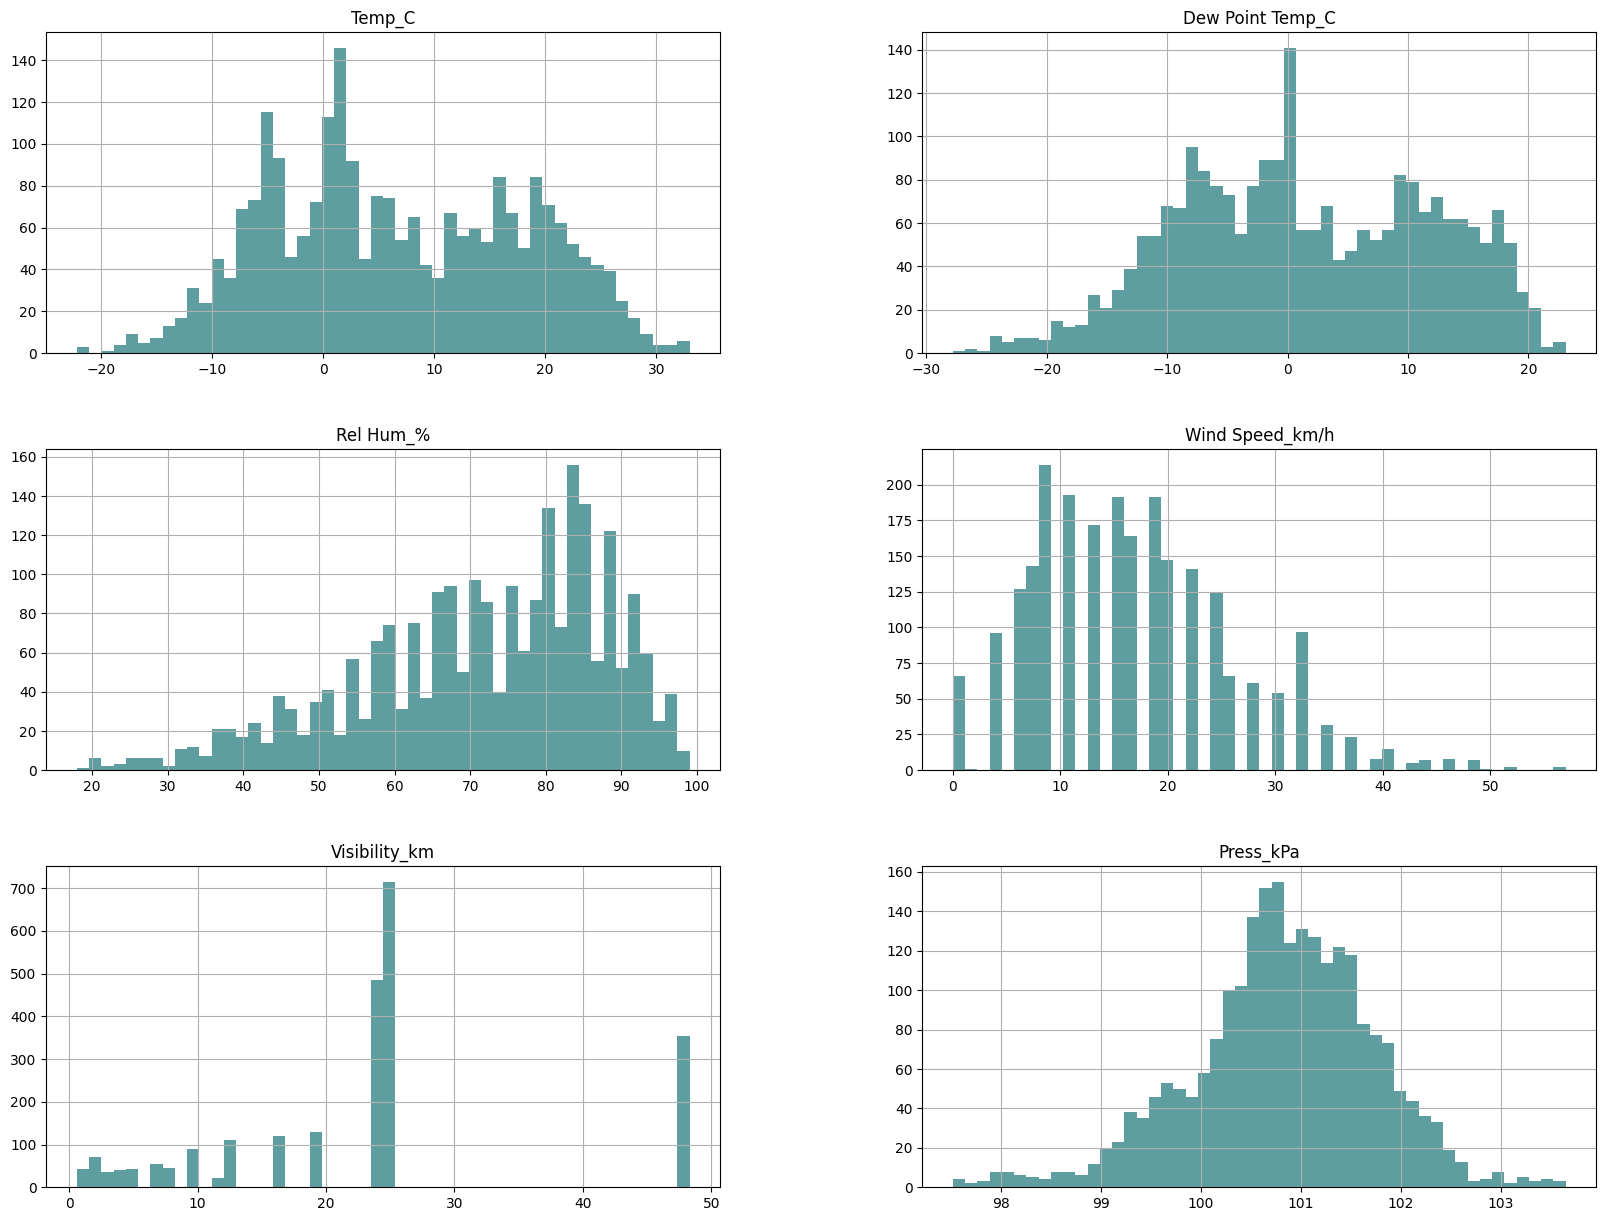

In [28]:
# how data can distribute for numerical column
# identify patterns, check data quality, and perform comparative analysis
data_hist_plot = weather_df.hist(bins=50, figsize=(20,15),color='#5F9EA0')

In [29]:
num_cols=weather_df.select_dtypes(exclude=['object']).columns.tolist()# ignoring specific columns
num_cols

['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa']

Label Encodiing

In [30]:
# converting target variable into the numeric
#convert categorical labels into numerical values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
weather_df['std_Weather'] = le.fit_transform(weather_df['std_Weather'])

In [31]:
# list of all the unique classes
le.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [32]:
cat_code =dict(zip(le.classes_, le.transform(le.classes_)))
cat_code

{'Clear': 0, 'Cloudy': 1, 'RAIN': 2, 'SNOW': 3}

In [33]:
weather_df.std_Weather.value_counts()

,count
std_Weather,
2,603
1,600
0,600
3,556


now convert into x and y variable

In [34]:
#independant variable
X = weather_df.drop('std_Weather', axis = 1)
# Target variable(standard variable):
y = weather_df['std_Weather']
#identifying patterns between

Feature Scalling

In [35]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_std= std_scaler.fit_transform(X)
X_std

array([[ 1.47136351,  1.68628235,  0.32066098, -0.39294373, -0.31369624,
        -1.38825445],
       [ 1.43574351,  1.72475959,  0.56655753, -1.03406483,  0.13091784,
        -0.26899725],
       [-1.49400162, -1.43037367,  0.32066098, -0.8203578 ,  0.13091784,
         0.68726134],
       ...,
       [-0.63912158, -0.28567593,  1.30424717,  1.20985902, -1.44473205,
        -0.94272488],
       [-0.61240658, -0.31453386,  1.05835062,  1.20985902, -1.06251995,
        -0.98619118],
       [-0.59459658, -0.34339179,  0.87392821,  1.42356606, -0.937716  ,
        -1.00792433]])

Splitting data into training and testing

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42,stratify=y)
X_train.shape, X_test.shape

((1651, 6), (708, 6))

Model Building

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB #works well with categorical and continuous data.
from sklearn.ensemble import AdaBoostClassifier #that combines multiple weak classifiers to create a strong classifier.
from sklearn.ensemble import GradientBoostingClassifier# corrects errors made by the previous models,
from sklearn.ensemble import ExtraTreesClassifier #similar to Random Forest, but it builds trees more randomly.


Creating Object of each modeling

In [38]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ETC=ExtraTreesClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
NB = GaussianNB()

In [39]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

models=[LR,DT,RF,ETC,SVM,KNN,GBC,ABC,NB]
features=X_std
labels=y
CV=5#1-validation,4-training.
accu_list=[]
modelName=[]

for model in models:
    model_name=model.__class__.__name__
    accuracies=cross_val_score(model,features,labels,scoring="accuracy",cv=CV)
    accu_list.append(accuracies.mean()*100)
    modelName.append(model_name)

model_acc_df=pd.DataFrame({"Model":modelName,"Cross_Val_Accuracy":accu_list}) #his creates a DataFrame to store the model names and their corresponding cross-validation accuracy scores.
model_acc_df
model_acc_df.sort_values(by="Cross_Val_Accuracy",ascending=False)


,Model,Cross_Val_Accuracy
2,RandomForestClassifier,62.527889
6,GradientBoostingClassifier,62.147073
3,ExtraTreesClassifier,60.408435
4,SVC,60.326478
0,LogisticRegression,59.731728
8,GaussianNB,58.925114
7,AdaBoostClassifier,58.035014
5,KNeighborsClassifier,54.940714
1,DecisionTreeClassifier,52.608676


Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

classification

In [41]:
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63       180
           1       0.50      0.43      0.46       180
           2       0.72      0.74      0.73       181
           3       0.82      0.83      0.83       167

    accuracy                           0.66       708
   macro avg       0.66      0.67      0.66       708
weighted avg       0.66      0.66      0.66       708



confusion matrix

<Axes: >

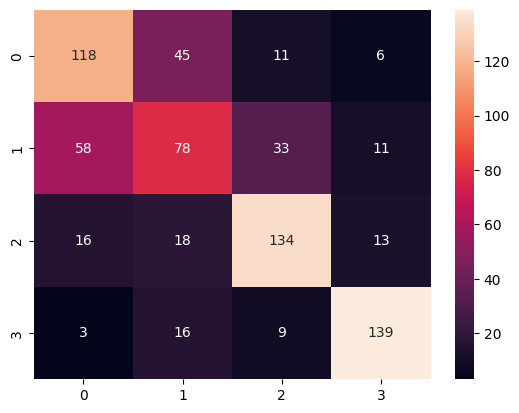

In [42]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [43]:
from sklearn.model_selection import GridSearchCV # import GridSearchCV from sklearn.model_selection

#hyperparameter tunning : Model tuning
parameters = {'n_estimators': [50,100],'max_features': ['sqrt', 'log2'],"criterion":['gini','entropy']}

grid_search = GridSearchCV(estimator=RF,param_grid=parameters) # Now GridSearchCV should be recognized
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}

cerating a new model

In [44]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
RF_new = RandomForestClassifier(**grid_search.best_params_) # Initialize RF_new with the best parameters
RF_new.fit(X_train,y_train)
y_pred_rf = RF_new.predict(X_test) # Use RF_new for prediction
accuracy_score(y_test,y_pred_rf)

0.6596045197740112

In [45]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_Weather
6033,23.2,19.0,77,13,19.3,99.54,1
5110,22.8,19.4,81,7,25.0,100.57,1
8762,-10.1,-13.4,77,9,25.0,101.45,1
1590,-4.3,-10.3,63,15,24.1,101.98,1
341,-21.3,-26.5,63,6,25.0,102.19,1


weather prediction system -Random forest Model

In [46]:
Temp=float(input("Enter the temperature_c = "))
Dew_point_Temp=float(input("Enter the dew_point_temp = "))
Humidity=float(input("Enter the humidity = "))
Wind_speed=float(input("Enter the wind_speed = "))
Visibility=float(input("Enter the visibility = "))
Pressure=float(input("Enter the pressure = "))

input_data =[Temp,Humidity,Wind_speed,Visibility,Pressure,Dew_point_Temp]
scaled_data = std_scaler.transform([input_data])
prediction = RF_new.predict(scaled_data)
prediction

print("")
print("*******Weather prediction Model******")
print("")

if prediction[0] == 0:
  print("The weather is CLEAR")
elif prediction[0] == 1:
  print("The weather is CLOUDY")
elif prediction[0] == 2:
  print("The weather is RAINY")

Enter the temperature_c = 21
Enter the dew_point_temp = -7
Enter the humidity = 30
Enter the wind_speed = 12
Enter the visibility = 50
Enter the pressure = 100

*******Weather prediction Model******

The weather is CLEAR
